In [1]:
%matplotlib notebook

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()

# Time-Marching Methods

The model hyperbolic PDE is the one-dimensional wave equation or otherwise known as the linear advection equation, which is a given by

$$
\frac{\partial u}{\partial t} + a \frac{\partial u}{\partial x} = 0
$$

The one-dimensional linear advection equation governs the propagation of a *wave* in time with constant speed $a$. If we define the initial condition to be $u(x,0)=u_0(x)$, then the exact solution of the equation is given by $u(x,t)=u_0(x-at)$. We expect the wave to propagate with out any change of shape (*no diffusion*). 

Using finite-difference formulae, we can numerically approximate both the spatial and temporal derivatives, and we have introduced the concept of point and matrix difference operators for these approximations. Using the method of lines, we can write the PDE as

$$
\frac{\textrm{d} \mathbf{u}}{\textrm{d} t} = \mathbf{A} \mathbf{u}
$$

where the matrix $\mathbf{A} = a \mathcal{D}$ contains the matrix difference operator for the finite-difference formula. We can represent the above system of ordinary differential equations as

$$
\frac{\textrm{d} \mathbf{u}}{\textrm{d} t} = \mathbf{u}^{\prime}_n = R(\mathbf{u}_n,t_n)
$$

where we have introduced the function, $R$, to increase the sophistication of our notation. Also, note that $\mathbf{u}_n$ is a vector quantity representing the values of all $u_i^n$ at each mesh point at time, $t_n$. As an example, the *residual* function, $R$ at time $t_n$ may equal

$$
R(\mathbf{u}_n,t_n) = \mathbf{u}^{\prime}_n = \mathbf{A} \mathbf{u}_n
$$

where the matrix $\mathbf{A}$ is still the finite-difference matrix operator, but what is $R$ at the the next (or some intermediate) time step? Instead of explicitly defining it (gives us an opprotunity for some generality), we can state

$$
R(\mathbf{u}_{n+\alpha},t_n + \alpha \Delta t)
$$

In other words, $R$ can be thought of as the evaluation of the spatial matrix operators at some arbitrary time step $t_n + \alpha \Delta t$, where $\alpha$ is some constant. 

Some commonly used *time-marching* algorithms are:

$$
\mathbf{u}_{n+1} = \mathbf{u}_n + \left( \Delta t \right) \mathbf{u}^{\prime}_n = \mathbf{u}_n + \left(\Delta t \right) R(\mathbf{u}_{n},t_{n}) 
$$

or

$$
\mathbf{u}_{n+1} = \mathbf{u}_n + \left( \Delta t \right) \mathbf{u}^{\prime}_{n+1} = \mathbf{u}_n + \left(\Delta t \right) R(\mathbf{u}_{n+1},t_{n+1}) 
$$

and lastly, a two-step solution
\begin{align}
\widetilde{\mathbf{u}}_{n+1} &= \mathbf{u}_n + \left( \Delta t \right) \mathbf{u}^{\prime}_{n} \\
\mathbf{u}_{n+1} &= \frac{1}{2} \left[ \mathbf{u}_n + \widetilde{\mathbf{u}}_{n+1} + \left( \Delta t \right) \widetilde{\mathbf{u}}^{\prime}_{n+1} \right]
\end{align}

The first and third of these are examples of explicit, time-marching methods. The first being the explict Euler method, and the third being the MacCormack predictor-corrector methd. The second is the implicit Euler method. We have two choices to make:

1. How to define the matrix operator, $\mathbf{A}$? This determines the spatial order of scheme, in other words, the truncation error of the finite-difference approximations to the spatial derivatives.


2. What time-marching method to use? Explicit (forward) Euler, Implicit (backward) Euler, etc.

Can we combine just any time-marching method with any spatial finite-difference operator? No, we can't. Lets look at a few examples.

# Matrix-operator Form

## Explicit Euler Time Integration

Let us look at the explicit Euler time-marching method first. It is defined as

$$
\mathbf{u}_{n+1} = \mathbf{u}_n + \left( \Delta t \right) \mathbf{u}^{\prime}_n 
$$

with

$$
\mathbf{u}^{\prime}_n = R(\mathbf{u}_{n},t_{n}) = \mathbf{A} \, \mathbf{u}_n
$$

where the matrix operator $\mathbf{A}$ can be defined for any finite-difference operator for the first-derivative, i.e., forward, backward, or central. With some rearrangement, we can write

$$
\mathbf{u}_{n+1} = \Big[ \mathbf{I} + \left( \Delta t \right) \mathbf{A} \Big] \mathbf{u}_n 
$$

where the matrix $\mathbf{I}$ is the identity matrix. From the above expression, we see that the solution at the next time step, $u_{n+1}$, is *explicitly* determined from the current values of $u_i^n$.

## Implicit Euler Time Integration

Let us look at the explicit Euler time-marching method first. It is defined as

$$
\mathbf{u}_{n+1} = \mathbf{u}_n + \left( \Delta t \right) \mathbf{u}^{\prime}_{n+1}
$$

with

$$
\mathbf{u}^{\prime}_{n+1} = R(\mathbf{u}_{n+1},t_{n+1}) = \mathbf{A} \, \mathbf{u}_{n+1}
$$

where the matrix operator $\mathbf{A}$ can be defined for any finite-difference operator for the first-derivative, i.e., forward, backward, or central. With some rearrangement, we can write

$$
\Big[ \mathbf{I} - \left( \Delta t \right) \mathbf{A} \Big] \mathbf{u}_{n+1} =  \mathbf{u}_n 
$$

From the above expression, we see that the solution at the next time step, $u_{n+1}$, requires the solution to a linear system with a right-hand side of $u_i^n$. 


# Point-operator Form

The above expression is a general representation of any explicit Euler method. We can derive this same result using the point-operator form. 

## Forward-time, backward-space 

We can apply finite-difference approximation directly to each of the time and space derivatives. In this case, we will apply a forward, first-order difference in time and a backward, first-order difference in space resulting in
$$
\left( \delta_t^+ u \right)^n_i  + a \left(\delta^{-}_x u\right)^n_i  = 0,
$$

which we can then expand as 

$$
\frac{ u^{n+1}_i -  u^n_i }{\Delta t} + a \frac{ u^n_i -  u^n_{i-1} }{\Delta x}  = 0.
$$

where $\Delta x$ is the spacing between each mesh point, and $\Delta t = t_{n+1} - t_n$. Using this notation, we can define the following: 

  - $u^{n}_i$ is the value of $u$ at time $t_n$ at the discrete location $x_i$. 
  

  - $u^{n+1}_i$ is the value of $u$ at time $t_{n+1}$ at the discrete location $x_i$. 

From the truncation error of the difference approximations, we can say that this method is first-order accurate in time and space, in other words the truncation error is of the order $\mathcal{O}(\Delta t, \Delta x)$. We can represent this numerical method using the following diagram.

<img src="FTBS_Explicit.png" alt="FTBS_Explicit.png" width="200" height="300">

The *stencil* diagram visually shows the mesh points and time points that are used in the difference equation. Rearranging the difference equation, we can directly solve for the value of $u$ at the next time step, $t_{n+1}$, as follows:

$$
u_i^{n+1} = u_i^n - a \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)
$$

Collecting the constant terms and redefining them as $\beta$,

$$
\beta = a \frac{\Delta t}{\Delta x}
$$

we get

$$
u_i^{n+1} = u_i^n - \beta \, \Big( u_i^n - u_{i-1}^n \Big)
$$

The constant $\beta$ is often referred to as the CFL number (more on this later).

# Solutions to the  Linear Advection Equation


## Procedure

1. Create a mesh with $N$ discrete points.


2. Define the initial conditions, $u(x,0) = u_0(x)$. 


3. Allocate storage for the solution vector, $u(x,t)$. The solution varies in both space, $x$, and time, $t$. As a result, we need to define a variable to store the solution at all $x_i$ and $t_n$ points. For our computer program, this means that $u(x,t)$ should be represented as a two-dimensional matrix.


4. Set the solution at the first time step $n=1$ to the initial condition. For $u(x_i,t_n)$, where $x_i$ is the $x$-position of each node in the mesh, and $t_n$ is the time at $n$-th time step, setting the initial condition entails  $u(x_i,t_1) = u_0(x_i)$.


5. Define the matrix difference operator (or point operator). 


6. Modify the difference operator to include the boundary conditions.


7. Update the solution from the current time step, $n$, to the next time step, $n+1$ using the selected time-marching method. In other words use the difference equation to solve for $u(x_i,t_{n+1})$.


8. Repeat steps 6 and 7 until $t = t_{final}$.

## Create the mesh

The first step in finding a solution for $u(x,t)$ is to create the mesh or grid of the solution domain or computational domain. To create a mesh or a grid we divide the domain into a discrete number of nodes or points. 

Let us consider a one-dimensional domain of length, $L_x = 2.0$, that is divided uniformly into $I$ points. If we have $N_x$ points or "nodes", then the distance between the nodes is given by the formula:

$$
\Delta x = \frac{L_x}{N_x - 1}
$$

In addition to the dividing the spatial domain into a discrete number of mesh points, we also divide the time into a uniform number of time steps, where $\Delta t$ is the time increment. Therefore, the physical time at the $n+1$ time step is

$$
t_{n+1} = t_{n} + \Delta t
$$

Thus, 

$$
t_{final} = N_t \Delta t
$$

Translating this into code results in

In [2]:
# Define the mesh
Lx = 2.0
nx = 81
dx = Lx / (nx - 1)

# The numpy function linspace creates a "linear" space, uniformaly divided 
# into nx points. This function returns a one-dimensional numpy array.
x = np.linspace(0, Lx, nx)

# We can print information about the size of x. Every numpy array has a
# shape attribute, which we can print using the following:
#
#print(x.shape)

# Set the time step
dt = 0.025

# Set the wave speed to 1
a = 1

## Initial Conditions

Let the initial condition be defined by the step function

$$
u(x,t_0) = \begin{cases} 
            1.0 & x \lt 0.5 \\
            2.0 & 0.5 \leq x \leq 1.0 \\
            1.0 & 1.0 \lt x 
           \end{cases}
$$

Since the mesh size is constant, we know that the value of $x$ at any node index, $i$, is given by the formula

$$
x_i = i \Delta x
$$

Using this formula, we can easily find the node indices where $x=0.5$ and $x=1.0$ The index of the of $x = z$ is

$$
n = \frac{z} {\Delta x}
$$

Translating this into code, looks like the followin

In [3]:
# Define the initial conditions
x1 = 0.5
x2 = 1.0

i1 = int(x1 / dx)
i2 = int(x2 / dx) + 1

# Define the vector u that has a similar dimension as x. Set all the values
# to one. This is what the numpy function "ones_like" does.
#
u = np.ones_like(x)

# We can use the following notation to selectively set the values of u
# between the indices "i1" and "i2". This is called "slicing".
#
u[i1:i2] = 2

# Notes

#print(u[:])   # print all the values in the array u
#print(u[1])   # print the second value (indexing starts at 0)
#print(u[0:5]) # print the first 5 values

# Negative indexing counts from the back
#print(u[-1])     # print the last value
#print(u[-2])     # print the second to last value
#print(u[10:-2])  # print the values from 10 to the second to last

<IPython.core.display.Javascript object>


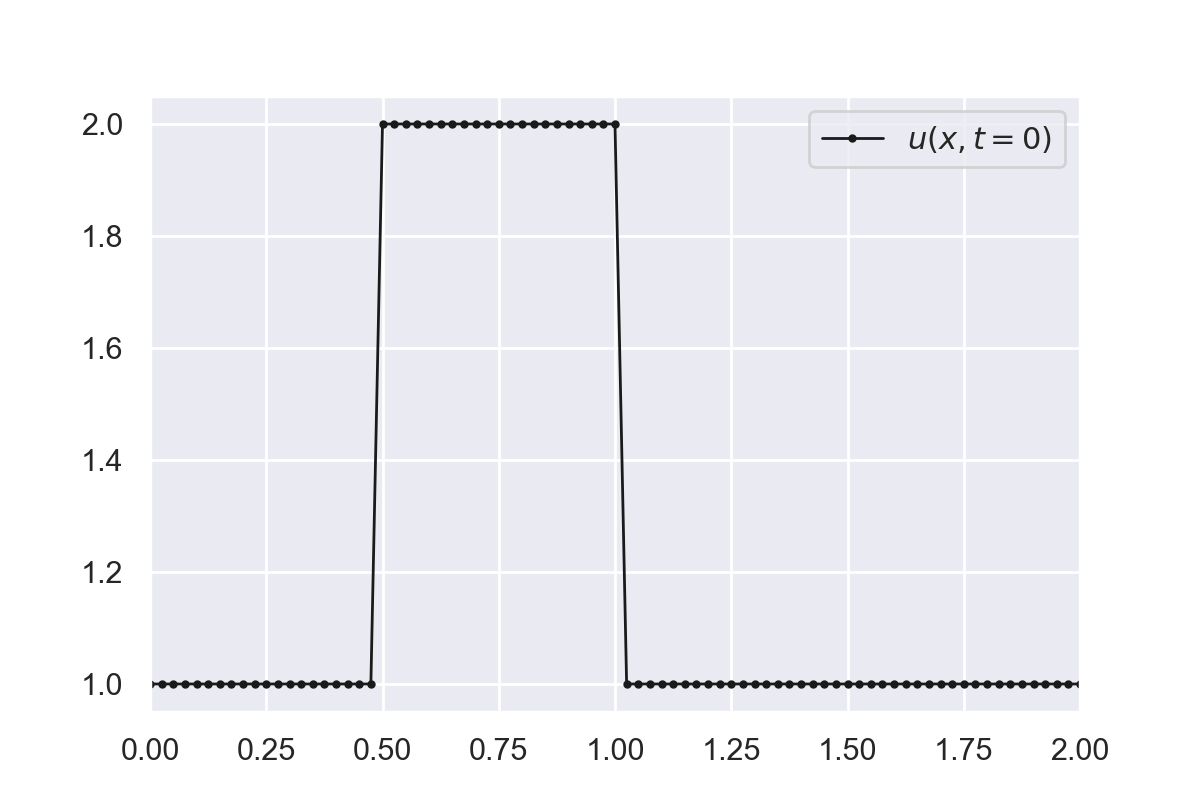

(0, 2)

In [4]:
# Plot the initial condition

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

line = ax.plot(x, u, lw=1, c='k', 
               marker='o', ms=2, label=r'$u(x,t=0)$')

ax.legend()
ax.set_xlim((0,2))

## Define the Numerical Algorithm 

### Explicit Euler Time Integration with First-order, Backward Differencing

If the above explaination of why using functions or other forms of data encapsulation is a really good idea, it is okay. You can achieve the same results without it, but at some point the use of functions or classes becomes a necessity. 

Regardless, let us define a function to compute a **single** time update. We will define this function to take as an agrument the values of at the current time step, $t_n$, and return the updated values of $u$ at the next time step, $t_{n+1}$. 

In [5]:
def ForwardTimeBackwardSpace(u, CFL):
    """
    Solve the forward-time, backward space difference equation for the 
    solution of the linear convection equation at the next time increment.
    
    Args:
        u (numpy.ndarray): values of u(x,t) at the current time step
        CFL (float): Value of a * dt / dx
        
    Returns:
        numpy.ndarray: u at the next time step
    """
    # Define an array to hold the solution at the next time step, n+1
    un = np.zeros_like(u)
    
    # Set the boundary condition at x = 0. We know it is the same as
    # the previous time step.
    un[0] = u[0]
    
    # Update the remaining points in the domain by looping from index
    # 1 to the last index. We can use the function len(u) to get the
    # total number of points.
    #
    for i in range(1,len(u)):
        un[i] = u[i] - CFL * (u[i] - u[i-1])
        
    # A more "Pythonic" way to do same thing as the for loop above 
    # would be to use NumPy vectorization
    # Result is the same, but this method is faster than a for loop
    #
    # un[1:] = u[1:] - CFL * (u[1:] - u[:-1])
    
    return un

The CFL is 1.0


<IPython.core.display.Javascript object>


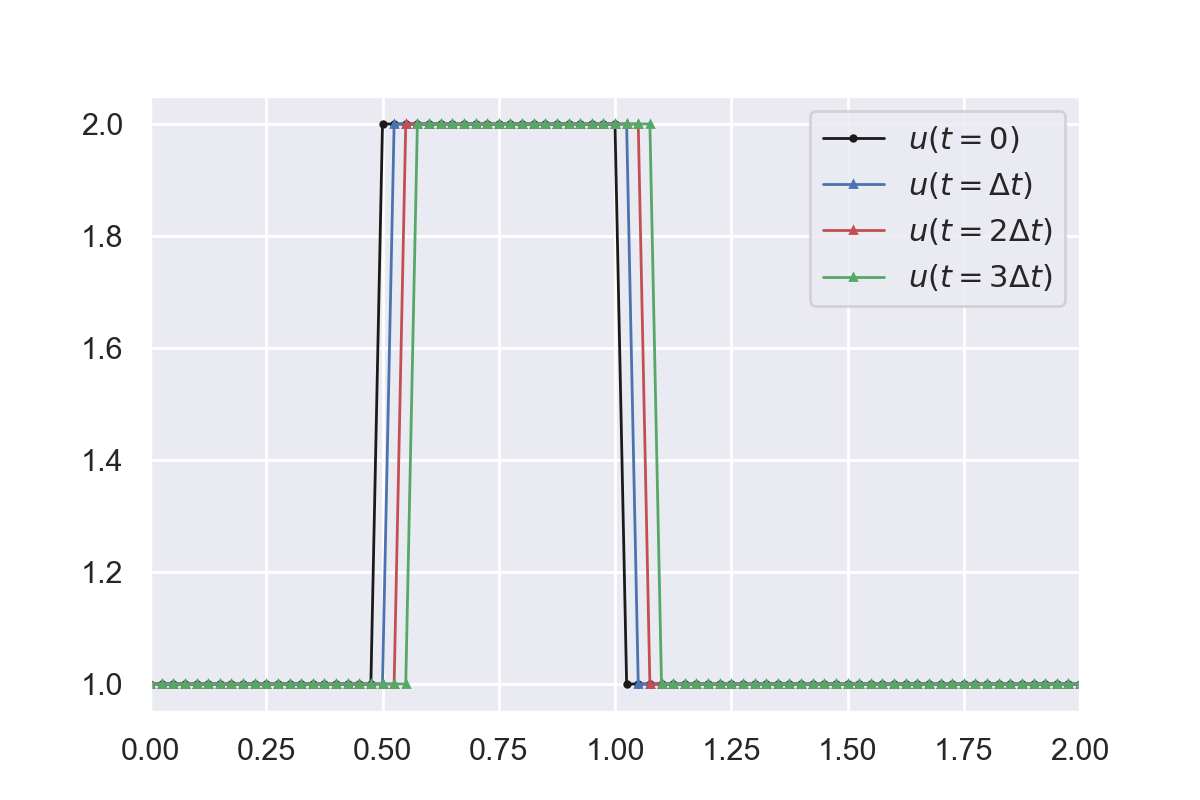

(0, 2)

In [6]:
beta = a * dt / dx
print(f'The CFL is {beta}')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

line = ax.plot(x, u, lw=1, c='k', 
               marker='o', ms=2, label=r'$u(t=0)$')

# Integrate one time step: t1 = t0 + dt  
u1 = ForwardTimeBackwardSpace(u, beta)

line = ax.plot(x, u1, lw=1, c='b', 
               marker='^', ms=2, label=r'$u(t=\Delta t)$')

# Integrate one time step: t2 = t1 + dt  
u2 = ForwardTimeBackwardSpace(u1, beta)

line = ax.plot(x, u2, lw=1, c='r', 
               marker='^', ms=2, label=r'$u(t=2\Delta t)$')

# Integrate one time step : t3 = t2 + dt
u3 = ForwardTimeBackwardSpace(u2, beta)

line = ax.plot(x, u3, lw=1, c='g', 
               marker='^', ms=2, label=r'$u(t=3\Delta t)$')


ax.legend()
ax.set_xlim((0,2))

## What happens if we increase the time step? 

The CFL is 1.0399999999999998


<IPython.core.display.Javascript object>


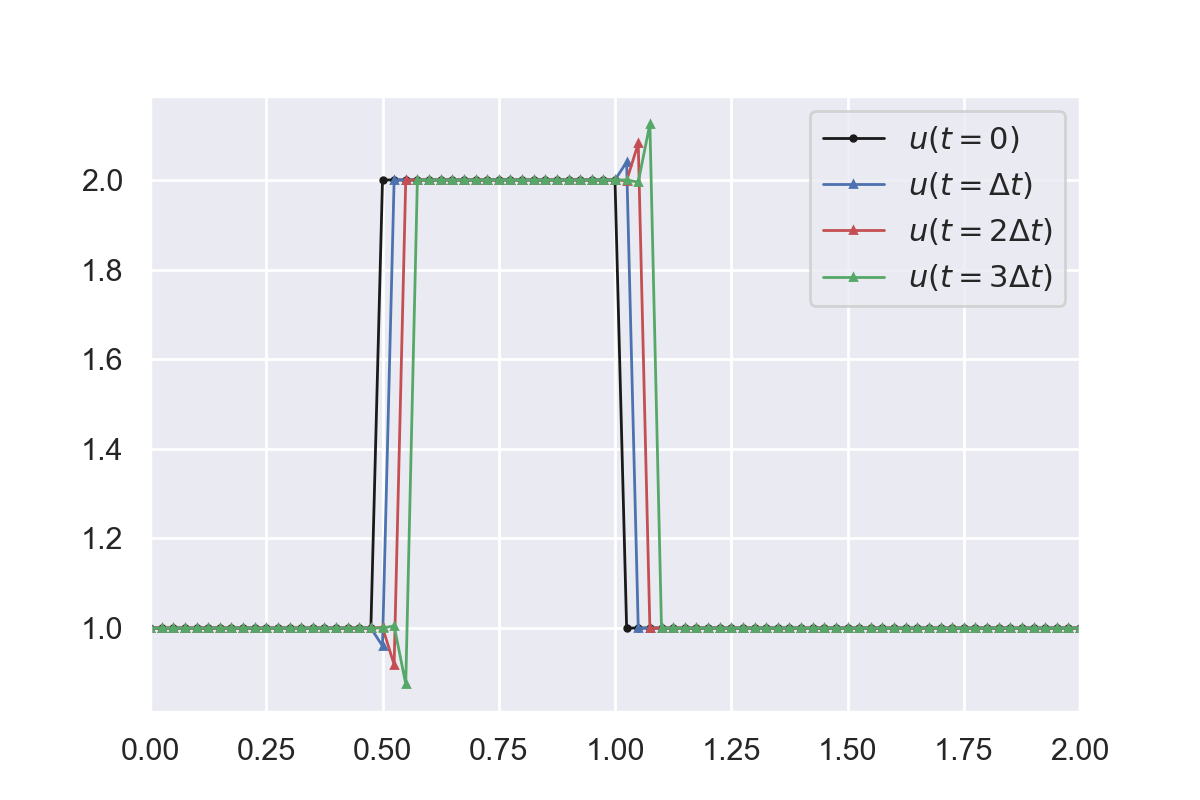

In [7]:
# Increase the time step by just a little
dt = 0.026

beta = a * dt / dx
print(f'The CFL is {beta}')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

line = ax.plot(x, u, lw=1, c='k', 
               marker='o', ms=2, label=r'$u(t=0)$')

# Integrate one time step: t1 = t0 + dt  
u1 = ForwardTimeBackwardSpace(u, beta)

line = ax.plot(x, u1, lw=1, c='b', 
               marker='^', ms=2, label=r'$u(t=\Delta t)$')

# Integrate one time step: t2 = t1 + dt  
u2 = ForwardTimeBackwardSpace(u1, beta)

line = ax.plot(x, u2, lw=1, c='r', 
               marker='^', ms=2, label=r'$u(t=2\Delta t)$')

# Integrate one time step: t3 = t2 + dt
u3 = ForwardTimeBackwardSpace(u2, beta)

line = ax.plot(x, u3, lw=1, c='g', 
               marker='^', ms=2, label=r'$u(t=3\Delta t)$')

ax.set_xlim((0,2))
ax.legend()

## What happened? The numerical algorithm is no longer stable!

In the previous example, we have used the explicit, forward-time, backward-space method to find a solution to the one-dimensional wave equation where the initial condition is a square wave. We have observed that if the CFL is larger than one, the solution becomes unstable. In other words, once $\beta > 1$, we observe oscillations near the edges of the square wave that are not physical.

We have shown that the explicit, forward-time, backward-space method requires

$$
\beta = \frac{a \Delta t}{\Delta x} \leq 1.0
$$

Is there way to prove this? In other words, instead of showing this by trail and error as we have done above, can we determine what the stability criteria is for any numerical method, not just the forward-time, backward-space method?

**Yes**, it is called von Neumann stability analysis. This will be the topic of the next few lectures.


Note that the value of $\beta$ is a function of both the time step, $\Delta t$ and the mesh spacing, $\Delta x$. In the example, below we will compute the time step using a specified value of $\beta$ and the mesh spacing. In practice, the time step for a CFD simulation is calculated using the mesh spacing (defined by the mesh you want to use) and some *stability* criteria, which is imposed by the numerical method.

## Another Example - Convection of a cosine wave

In [8]:
# Define the domain and set the value of dx 
L1 = -np.pi
L2 = 10.0 * np.pi

dx = 0.04 * np.pi
nx = round((L2 - L1) / dx)
x = np.linspace(L1, L2, nx)

# Set the wave speed to 1.0
a = 1.0
t_final = 2.5

<IPython.core.display.Javascript object>


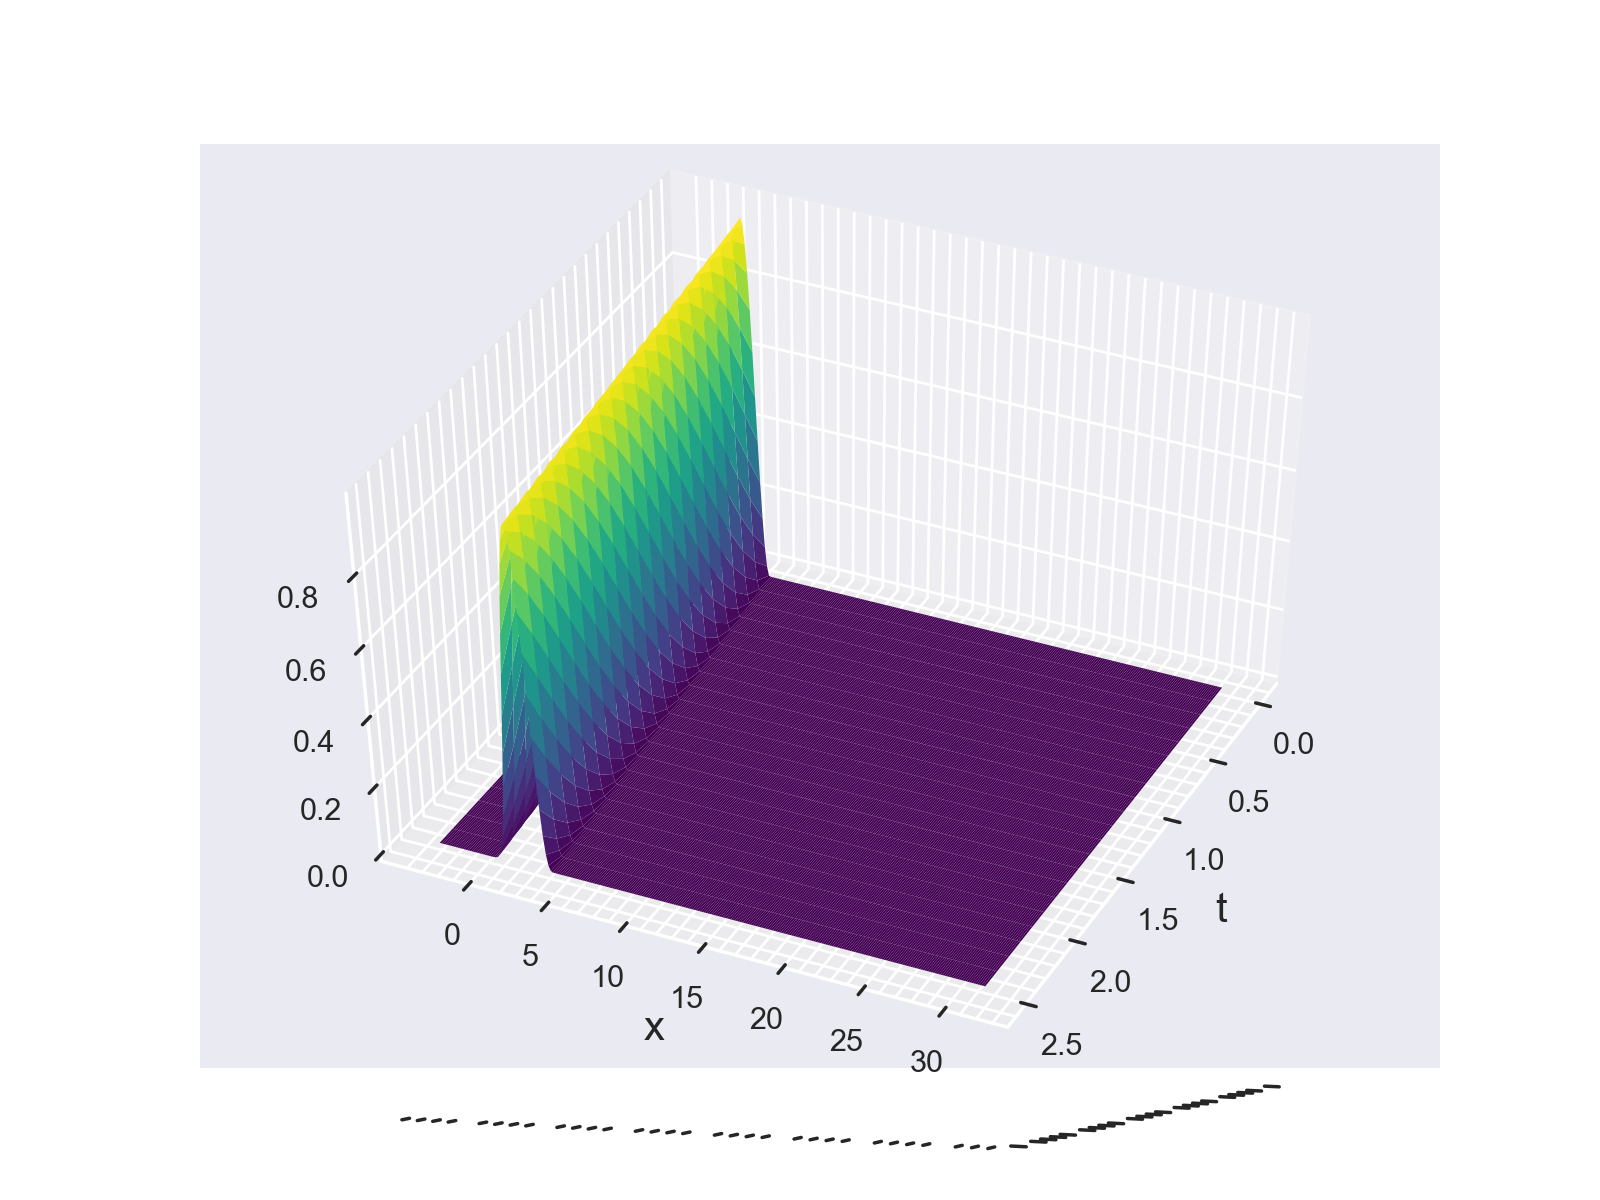

In [9]:
# Solve the solution using an CFL value of 0.9
beta = 0.9

# Using beta (or the CFL number), get the value of the time-step
dt = beta * dx / a

nt = round(t_final / dt)
t = np.linspace(0, t_final, nt)

u = np.zeros(nx)
for i in range(len(x)):
    if np.abs(x[i]) <= np.pi / 2:
        u[i] = np.cos(x[i])**2

# Define a 2D space - we want to save the solutions of u(t,x) in time and space
T, X = np.meshgrid(t, x)
U = np.zeros_like(X)

# Put the initial solution vector into the U array
U[:,0] = u[:]

# Solve
for i in range(1,nt):
    U[:,i] = ForwardTimeBackwardSpace(U[:,i-1], beta)

# Plot a 3D surface
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(T, X, U, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

ax.view_init(45, 25)

ax.set_xlabel('t', fontsize=15.0)
ax.set_ylabel('x', fontsize=15.0)
    
ax.minorticks_on()

### What happens when we increase the value of $\beta$?

<IPython.core.display.Javascript object>


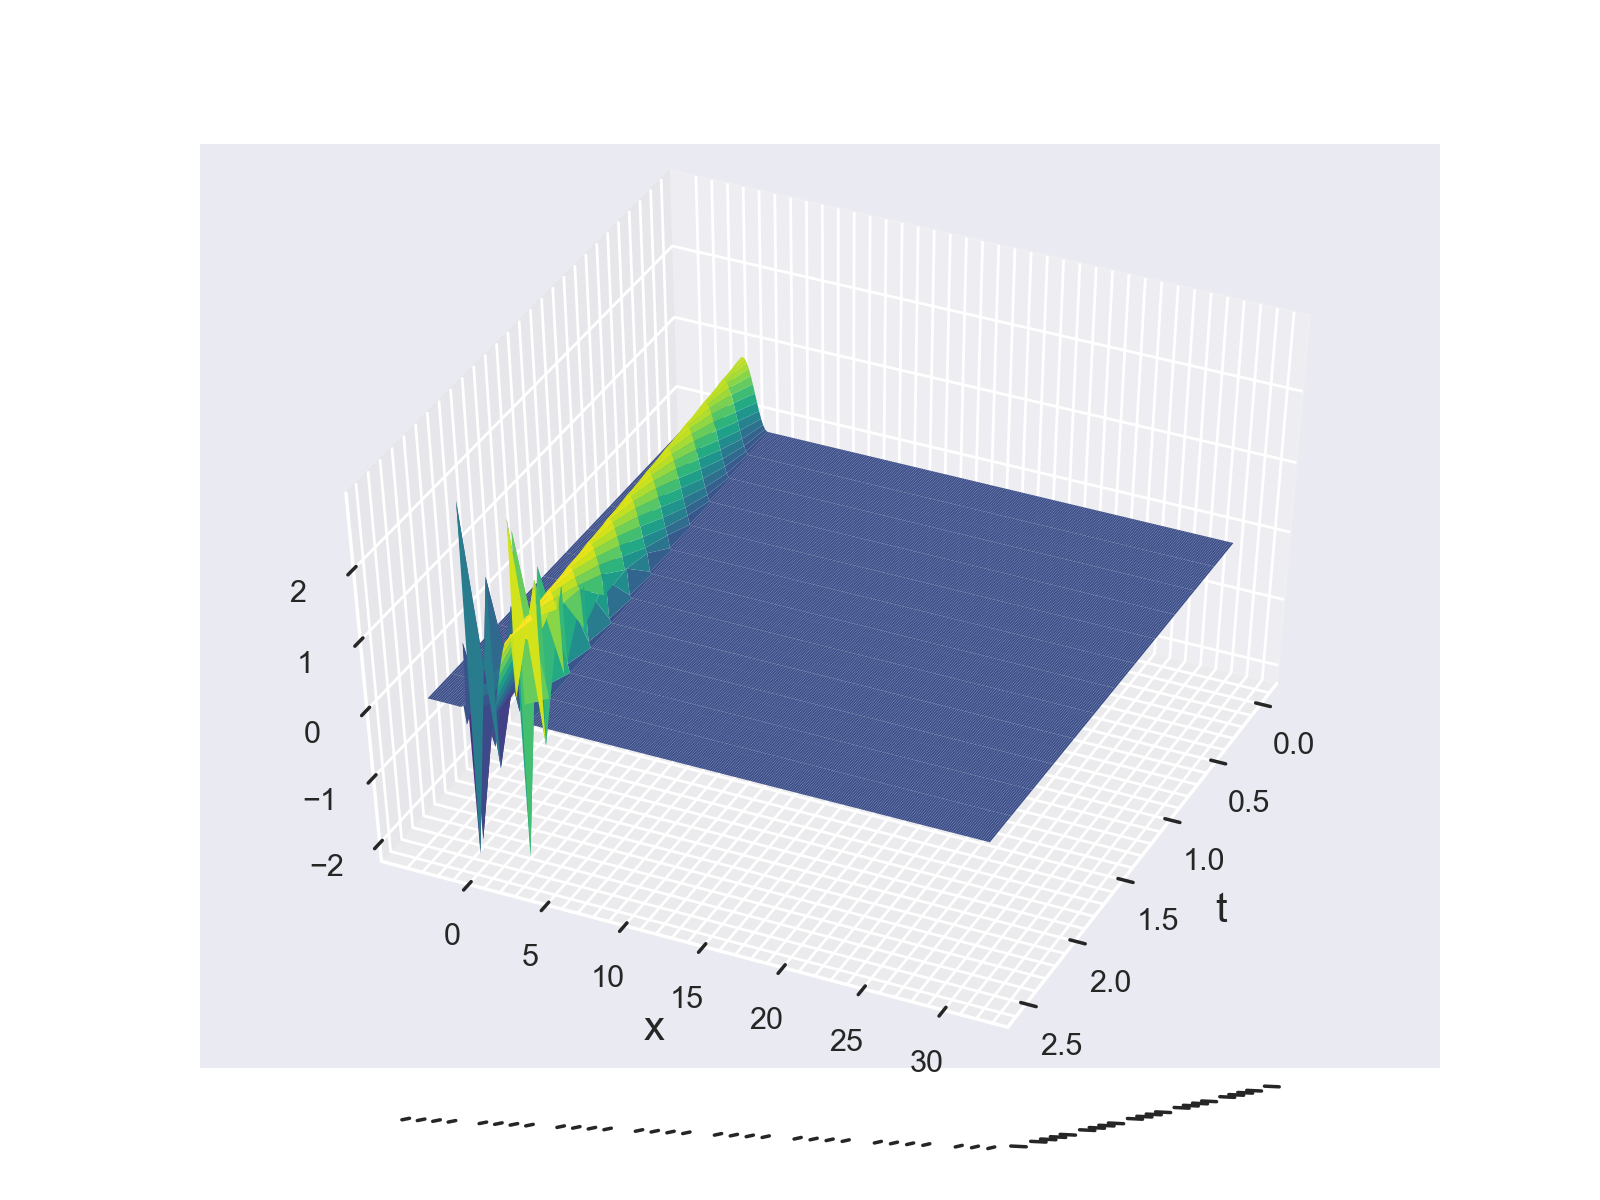

In [10]:
beta = 1.5
dt = beta * dx / a
nt = round(t_final / dt)
t = np.linspace(0, 2.5, nt)

u = np.zeros(nx)
for i in range(len(x)):
    if np.abs(x[i]) <= np.pi / 2:
        u[i] = np.cos(x[i])**2

T, X = np.meshgrid(t, x)
U = np.zeros_like(X)

U[:,0] = u[:]

for i in range(1,nt):
    U[:,i] = ForwardTimeBackwardSpace(U[:,i-1], beta)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(T, X, U, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

ax.view_init(45, 25)

ax.set_xlabel('t', fontsize=15.0)
ax.set_ylabel('x', fontsize=15.0)
    
ax.minorticks_on()

Once again, we see that once the value of $\beta$ is increased above 1, the numerical solution develops aphysical osccillations.